# MLR Bike Sharing Assignment

> ### Problem Statement:

> #### BoomBikes, a US bike-sharing provider, has experienced a significant drop in revenue due to the COVID-19 pandemic. To recover, they aim to understand the factors influencing bike demand to better prepare for post-pandemic market conditions. The company wants to know:

>    - Which variables are significant in predicting the demand for shared bikes.
>    - How well those variables describe the bike demands



> ### Business Goal:

> #### The business goal is to model the demand for shared bikes using available independent variables. This model will help BoomBikes understand how demand varies with different features, enabling them to adjust their business strategy to meet customer needs. By predicting bike demand, BoomBikes aims to stand out from competitors and maximize profits as the market recovers post-pandemic. The insights gained will also help the company understand demand dynamics in new markets.

###



## Importing the Libraries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

## Step 1 : Reading & Understanding the data

In [6]:
# Reading the data from the file

data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.shape

(730, 16)

In [8]:
# Dropping duplicate records if any
data = data.drop_duplicates()
data.shape

(730, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


> #### **Summary 1:**
>    - Data set consist of 730 rows & 16 columns
>    - No missing headers, footers, totals or subtotal fields
>    - None of the columns has any null records, No duplicate records. so no need of:
>            - Column drop due to missing value percentage high.
>            - Rows drop
>            - imputating values
>    - Data types of the columns seems to be all correctly picked up, so no need to change any incorrect data types.
    
>  - **ACTION**: Precision Round Off - For 4 columns "temp", "atemp", "hum", "windspeed".
>  - **ACTION**: Drop below 4 Column
                
>       - Column "instant" is just a counter and does not have any significance.
>       - Column "dteday" info is already available in columns "weekday", "mnth" & "yr". Hence will drop "dteday".
>       - Column "casual" + "registered" = "cnt", as we are using "cnt" as tatget variable, we will drop "casual" & "registered".


In [11]:
# Precision Round Off upto 2 Decimal places

data["temp"] = round((data["temp"]),2)
data["atemp"] = round((data["atemp"]),2)
data["hum"] = round((data["hum"]),2)
data["windspeed"] = round((data["windspeed"]),2)


In [12]:
# Dropping 4 column as we will not be using them in the model

data = data.drop(["instant", "casual", "registered", "dteday"], axis = 1)

In [13]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


## Step 2: Data Visualization (Univariate / Bivariate Analysis)

>#### Visualization of Numeric & Categorical variables

>Data Visualization will help to understand the data further and **decide / re-confirm if this is a clear case of MLR**

>   - **Numeric variables**: "temp", "atemp", "hum", "windspeed"
>   - **Categorical variables**: "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"
>   - **Target variable**: "cnt"

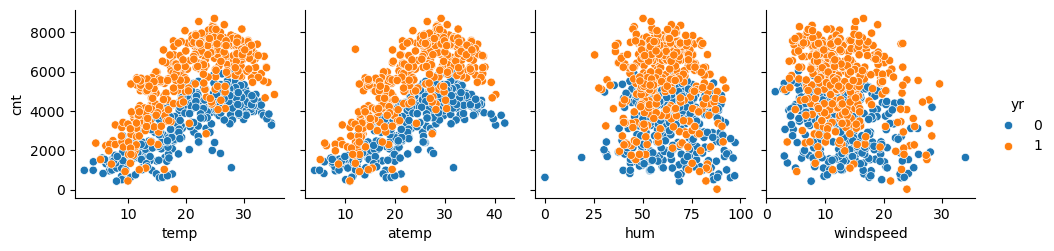

In [16]:
# Visualizing Numerical variable against Target variable

sns.pairplot(data=data, x_vars=["temp", "atemp", "hum", "windspeed"], y_vars=["cnt"],hue = "yr")
plt.show()

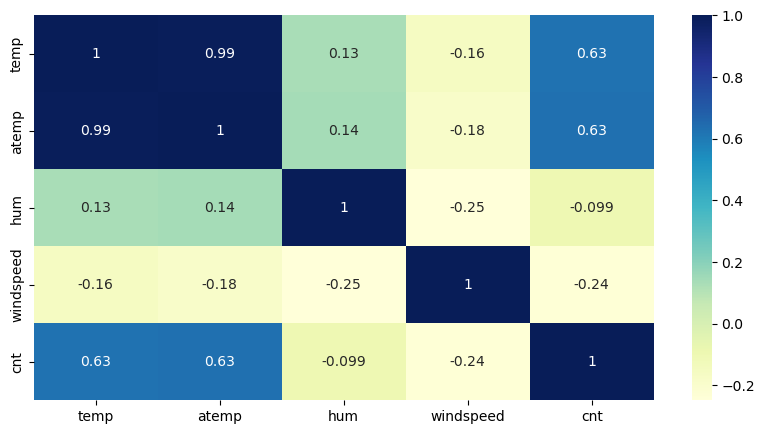

In [17]:
# Visualizing Numerical variable against Target variable using heatmap

plt.figure(figsize = (10,5))
sns.heatmap(data[["temp", "atemp", "hum", "windspeed","cnt"]].corr(),annot =True, cmap="YlGnBu")
plt.show()

In [18]:
# Dropping column "atemp" due to multi-collinearity.

data = data.drop(["atemp"], axis = 1)


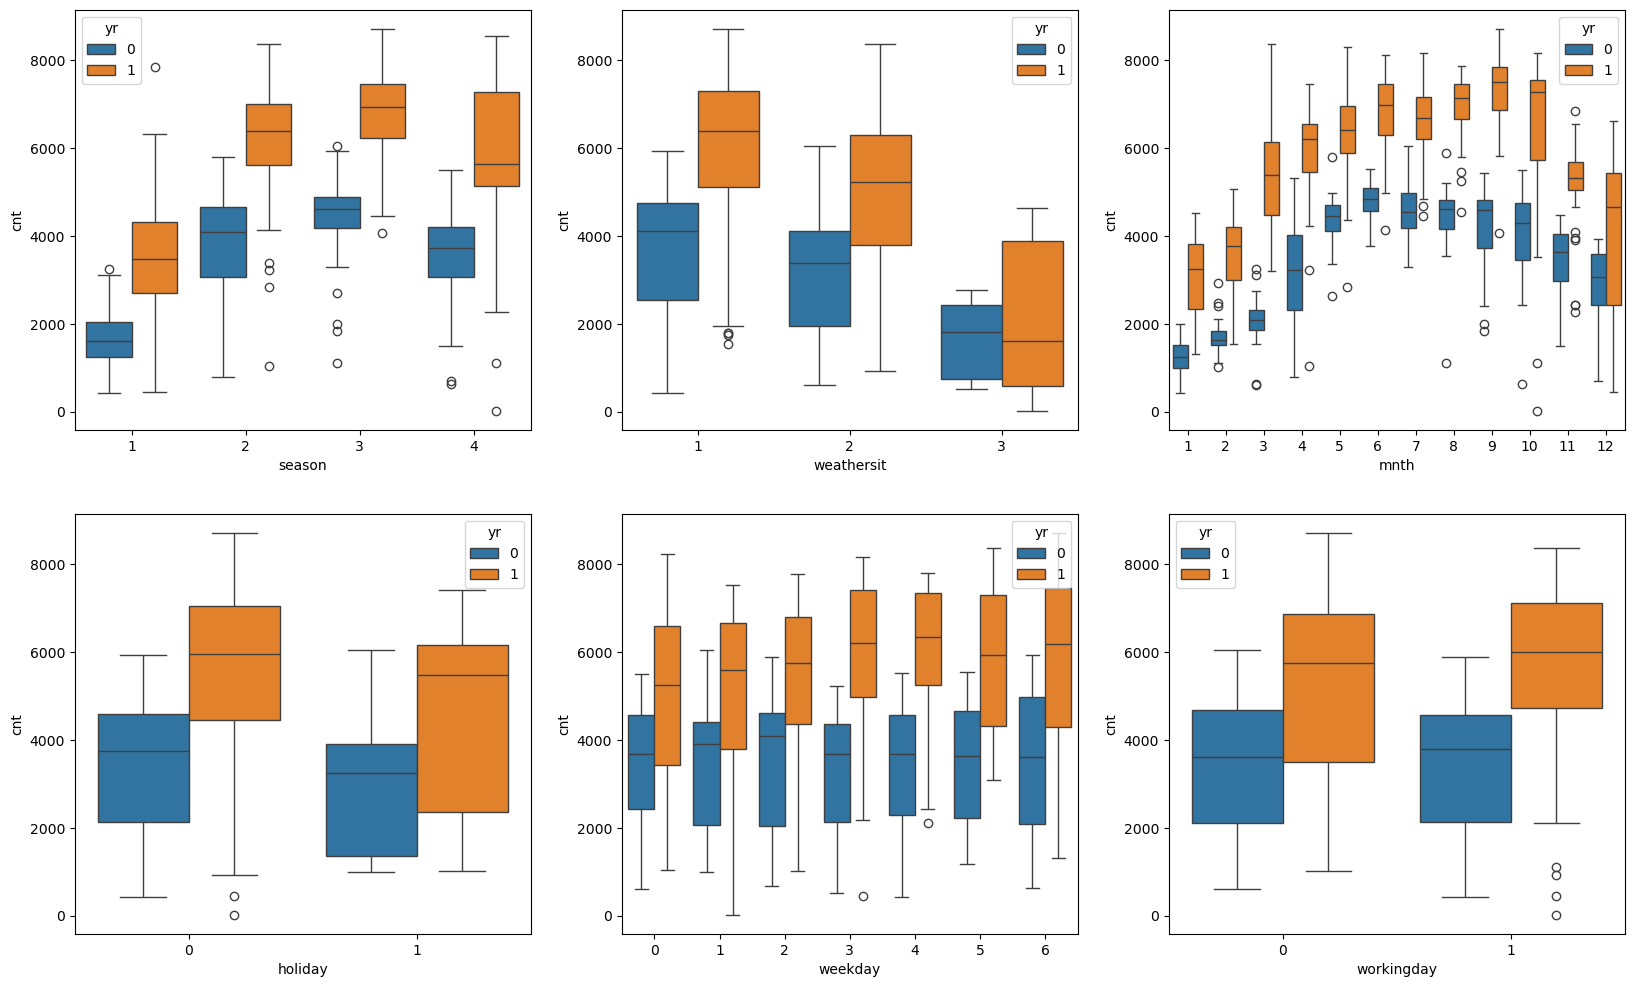

In [19]:
# Visualizing Categorical variable against Target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = "season", y = "cnt", data = data, hue = "yr")
plt.subplot(2,3,2)
sns.boxplot(x = "weathersit", y = "cnt", data = data, hue = "yr")
plt.subplot(2,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = data, hue = "yr")
plt.subplot(2,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = data, hue = "yr")
plt.subplot(2,3,5)
sns.boxplot(x = "weekday", y = "cnt", data = data, hue = "yr")
plt.subplot(2,3,6)
sns.boxplot(x = "workingday", y = "cnt", data = data, hue = "yr")
plt.show()

In [20]:
# Checking & understanding Column values with value_count() function.

data["season"].value_counts()

    # season values - 1,2,3,4
    # Yr values - 0 & 1
    # holiday values - 0 & 1
    # Weekday Values - 0 to 6
    # workingday values - 0 & 1
    # weathersit values - 1,2,3
    # mnth values - 1 to 12

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

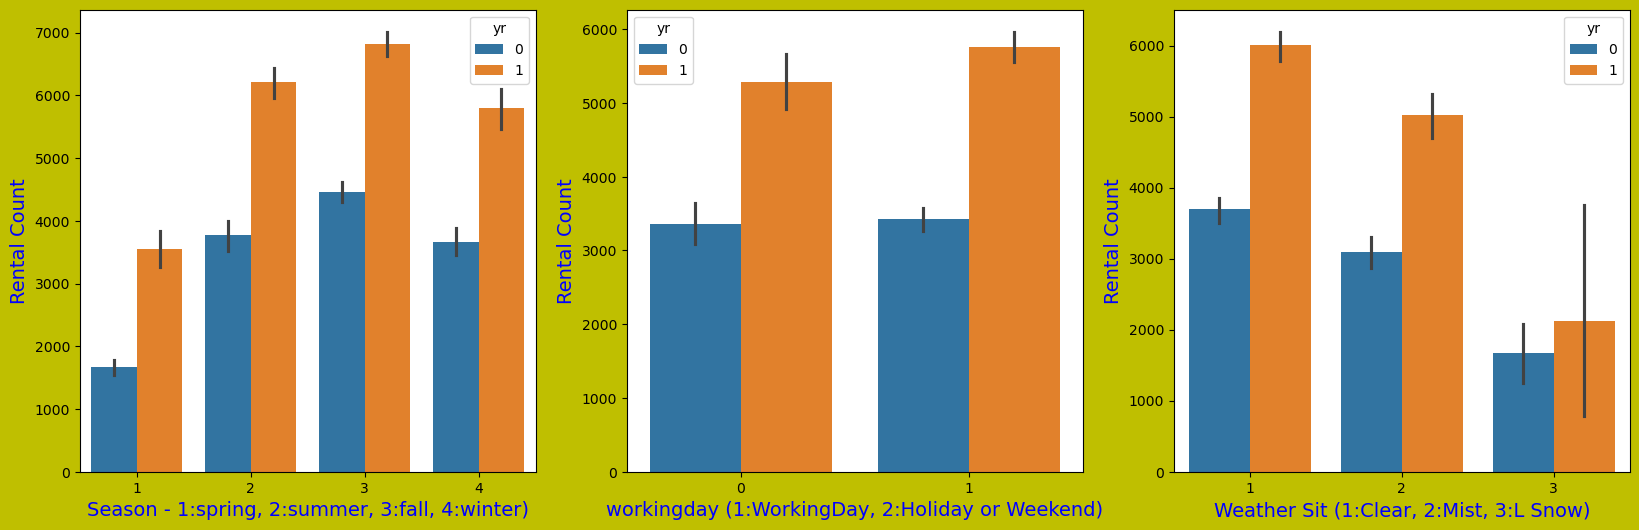

In [21]:
plt.figure(figsize=(20, 6), facecolor='y')

plt.subplot(1,3,1)
sns.barplot(x="season",y="cnt",data=data, hue="yr")
plt.xlabel('Season - 1:spring, 2:summer, 3:fall, 4:winter)',fontsize=14,color='b')
plt.ylabel('Rental Count',fontsize=14,color = 'b')

plt.subplot(1,3,2)
sns.barplot(x='workingday',y='cnt',data=data, hue='yr')
plt.xlabel('workingday (1:WorkingDay, 2:Holiday or Weekend)',fontsize=14,color='b')
plt.ylabel('Rental Count',fontsize=14,color = 'b')

plt.subplot(1,3,3)
sns.barplot(x='weathersit',y='cnt',data=data, hue='yr')
plt.xlabel('Weather Sit (1:Clear, 2:Mist, 3:L Snow)',fontsize=14,color='b')
plt.ylabel('Rental Count',fontsize=14,color = 'b')
plt.show()

>#### **Summary 2:**
>    - Classified the dataset as follows:
>        6 Numeric variables - "temp", "atemp", "hum", "windspeed".
>        7 Categorical variables - "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"
>        1 Target variable - "cnt"
>    - Based on pairplot visualization of numeric variable, a linear of some of the variables with the target variable.
>    - Based on heatmap visualization of numeric variable, 99% correlation between "temp" & "atemp", hence "atemp" dropped.
>    - Based on Boxplot visualization of Categorical variable, we see there are outliers in the dataset.

>  - **INFERENCE**: As the dataset shows linear relationship, target variable is continuous & there are outliers in the data, hence **it qualifies for MLR model** case.

>    - Further with the help of **value_count()** function, we conclude the following:
>        - We have to derive encoded columns for the 4 categorical columns => "season", "weekday", "weathersit", "mnth"
>        - Categorical columns "yr" & "holiday" are already in encoded form, no action needed here.

>  **Based on barplot** we also have the below understanding on the data:
>    - Count of Bike rentals are highest in Fall, followed by Summer & Winter. Spring showed the least demand.
>    - Bike rentals are comparable on workingday as wwell as holiday.
>    - Bike rentals were highest in a clear weather, follwed by mist and then Light snow. We do not have any recorded data for bike rentals during heavy rain. Still we can safely assume, due to adverse weather condition, bikes are not preferred during heavy rain. 

## Step 3: Data Preparation

### Create Dummy Variables & Derive Encoded Columns

##### **1. Derived columns from Season**

In [26]:
# Dummy Variable for season : season (1:spring, 2:summer, 3:fall, 4:winter)

season_label = pd.get_dummies(data["season"], dtype = int)
season_label.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [27]:
# Renaming Columns
season_label = season_label.rename(columns={1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = False)
season_label.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


All 4 columns not needed, can drop any one column because each of the column can be explained by remaining three. Hence Dropping the column 'spring':

*     000 - spring
*     100 - summer
*     010 - fall
*     001 - winter

In [29]:
# Merging Derived columns to dataset - "data".

data = pd.concat((data,season_label),axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,fall,winter
0,1,0,1,0,6,0,2,14.11,80.58,10.75,985,1,0,0,0
1,1,0,1,0,0,0,2,14.90,69.61,16.65,801,1,0,0,0
2,1,0,1,0,1,1,1,8.05,43.73,16.64,1349,1,0,0,0
3,1,0,1,0,2,1,1,8.20,59.04,10.74,1562,1,0,0,0
4,1,0,1,0,3,1,1,9.31,43.70,12.52,1600,1,0,0,0


In [30]:
# Dropping Off "Season", "Spring" columns as same can be explained by summer / Fall / winter columns.
data = data.drop(["season","spring"],axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.11,80.58,10.75,985,0,0,0
1,0,1,0,0,0,2,14.90,69.61,16.65,801,0,0,0
2,0,1,0,1,1,1,8.05,43.73,16.64,1349,0,0,0
3,0,1,0,2,1,1,8.20,59.04,10.74,1562,0,0,0
4,0,1,0,3,1,1,9.31,43.70,12.52,1600,0,0,0


##### **2. Derived columns from mnth**

In [32]:
# Dummy variable for Month

Month = pd.get_dummies(data["mnth"], dtype = int)
Month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# Renaming columns

Month = Month.rename(columns={ 1:"Jan",2:"Feb",3:"March",4:"April",5:"May", \
                               6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace = False)
Month.head()

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Merging Derived columns to dataset - "data".

data = pd.concat((data,Month),axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,1,0,6,0,2,14.11,80.58,10.75,985,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,14.90,69.61,16.65,801,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,8.05,43.73,16.64,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,1,8.20,59.04,10.74,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,1,9.31,43.70,12.52,1600,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Dropping Off "mnth", "Jan" columns as same can be explained by rest of the 11 mnth columns.
data = data.drop(["mnth","Jan"],axis=1)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,6,0,2,14.11,80.58,10.75,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.90,69.61,16.65,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.05,43.73,16.64,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.20,59.04,10.74,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.31,43.70,12.52,1600,0,...,0,0,0,0,0,0,0,0,0,0


##### **3. Derived columns from weekday**

In [37]:
# Dummy Variable for Weekday

Weekday = pd.get_dummies(data["weekday"], dtype = int)
Weekday.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [38]:
# Renaming Derived columns

WEEKDAYS = Weekday.rename(columns={1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday", \
                                   5:"Friday",6:"Saturday",0:"Sunday"},inplace = False)
WEEKDAYS.head(7)

,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0


In [39]:
# Merging Derived columns to dataset - "data".

data = pd.concat((data,WEEKDAYS),axis=1)
data.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer,...,Oct,Nov,Dec,Sunday,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,6,0,2,14.11,80.58,10.75,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,2,14.90,69.61,16.65,801,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,1,8.05,43.73,16.64,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,2,1,1,8.20,59.04,10.74,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,3,1,1,9.31,43.70,12.52,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
# Dropping Off "weekday", "Sunday" columns as same can be explained by rest of the 6 days columns.

data = data.drop(["weekday","Sunday"],axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday
0,0,0,0,2,14.11,80.58,10.75,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.90,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.05,43.73,16.64,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.20,59.04,10.74,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.31,43.70,12.52,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


##### **4. Derived columns from weathersit**

In [42]:
# Dummy Variable for Weathersit

Weathersit = pd.get_dummies(data["weathersit"], dtype = int)
Weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [43]:
# Renaming Derived Columns. We do not need 4: "Heavy Rain", as no data corresponding to it in the dataset.

Weathersit = Weathersit.rename(columns = {1:"Clear" ,2: "Mist" , 3: "L Snow"},inplace = False)
Weathersit.head()

,Clear,Mist,L Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# Merging Derived columns to dataset - "data".

data = pd.concat((data,Weathersit), axis =1)
data.head() 

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,L Snow
0,0,0,0,2,14.11,80.58,10.75,985,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,2,14.90,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.05,43.73,16.64,1349,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,1,8.20,59.04,10.74,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,9.31,43.70,12.52,1600,0,0,...,0,0,0,1,0,0,0,1,0,0


In [45]:
# Dropping Off "weathersit" columns as same can be explained by rest of the 6 days columns.
data = data.drop("weathersit",axis=1)
data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,Dec,Monday,Tuesday,Wednesday,Thrusday,Friday,Saturday,Clear,Mist,L Snow
0,0,0,0,14.11,80.58,10.75,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,43.73,16.64,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.20,59.04,10.74,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.31,43.70,12.52,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [46]:
# Running describe to check the data in totality. 
# Output transposed and rounded off to 2 decimal for better readability

round((data.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00
holiday,730.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,730.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
temp,730.0,20.32,7.51,2.42,13.81,20.46,26.88,35.33
hum,730.0,62.77,14.24,0.00,52.00,62.62,72.99,97.25
windspeed,730.0,12.76,5.20,1.50,9.04,12.13,15.63,34.00
cnt,730.0,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00
summer,730.0,0.25,0.43,0.00,0.00,0.00,1.00,1.00
fall,730.0,0.26,0.44,0.00,0.00,0.00,1.00,1.00
winter,730.0,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [47]:
data.shape

(730, 30)

> #### **Summary 3:**
>    - After deriving encoded columns, now the total columns increased from 15 to 30.
>    - We have dropped 4 categorical columns => "season", "weekday", "weathersit", "mnth" as they became redundant.
>    - Looking at the statsitical info of the dataset, Data is not uniform across all the variables hence we need to scale it.
>    - From previous EDA we understood there were outliers too, so we can use MinMaxScaler for Scaling.
    

## Step 4: Splitting the Data into Training and Testing Sets

   - The first basic step for regression is performing a train-test split.

In [50]:
# from sklearn.model_selection import train_test_split

# Splitting the data in 70% Training data and 30% will be used for testing.

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [51]:
# from sklearn.preprocessing import MinMaxScaler

# Initializing the Scaler object.
scaler = MinMaxScaler()

# Creating list of Numerical Variables which needs to Scaled
num_vars = ["temp", "hum", "windspeed", "cnt"]

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537300,0.225801,0.0,0.339866,0.540565,0.735339,1.0
hum,510.0,0.650378,0.145885,0.0,0.538644,0.653751,0.754818,1.0
windspeed,510.0,0.320866,0.169770,0.0,0.199230,0.296760,0.414501,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


> ##### **MinMaxScaler** has fitted & transformed the data well, as we see for the all the variables, Min=0 & Max=1 

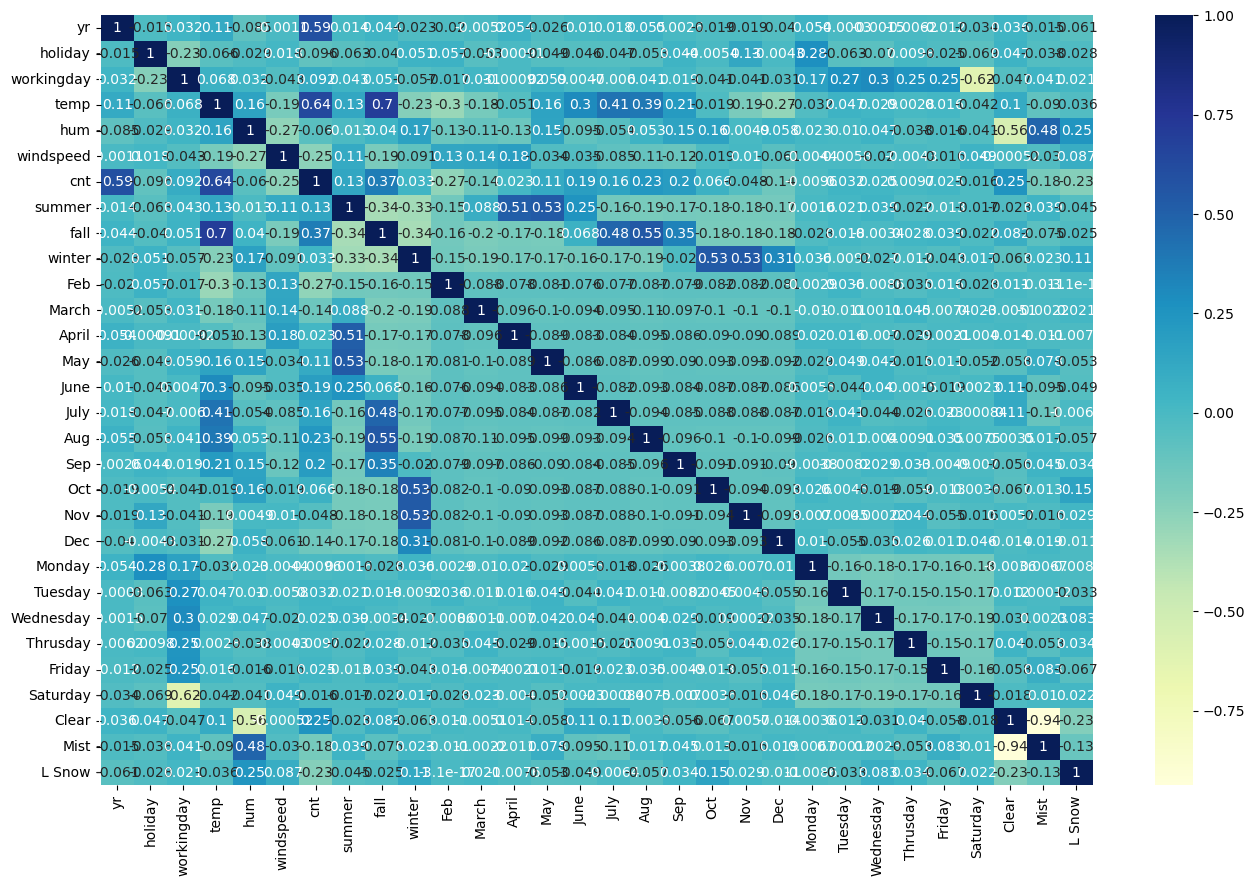

In [53]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

>##### **Heatmap** output shows manual approach of feature selection will be very impractical given that we have 30 variables to dela with. 

>##### Hence we will prefer to go with **RFE (Recursive feature selection) Method from SciKit Learn**

In [55]:
### Dividing into X and y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train
print (y_train.shape)
print (X_train.shape)

(510,)
(510, 29)


#### *Feature Selection using RFE(Recursive Feature Elimination)*

In [57]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

# Running RFE with the output number of variable equal to 13
lm = LinearRegression()

# Fit the Model
lm.fit(X_train, y_train)

# Pass the Model to RFE
rfe=RFE(lm,n_features_to_select=13)

rfe=rfe.fit(X_train, y_train)

In [58]:
# Using rfe.support_ to check if the feature / variable is selected
# Using rfe.ranking_ to check the top 13 features selected as Rank=1, and the rest other in the order of importance

list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 4),
 ('winter', True, 1),
 ('Feb', False, 9),
 ('March', False, 5),
 ('April', False, 7),
 ('May', False, 6),
 ('June', False, 8),
 ('July', False, 15),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', False, 3),
 ('Nov', False, 16),
 ('Dec', False, 17),
 ('Monday', False, 10),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13),
 ('Thrusday', False, 14),
 ('Friday', False, 12),
 ('Saturday', True, 1),
 ('Clear', True, 1),
 ('Mist', False, 2),
 ('L Snow', True, 1)]

In [59]:
# RFE Selected Features
col_s = X_train.columns[rfe.support_]
col_s

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [60]:
# RFE Rejected Features
col_r = X_train.columns[~rfe.support_]
col_r

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Oct', 'Nov',
       'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Mist'],
      dtype='object')

## Step 5: Building Model using statsmodels for the detailed statistics

#### Building 1st Multiple Linear Regression Model

In [63]:
# Creating X_train with RFE Selected features

X_train_rfe = X_train[col_s]

In [64]:
#import statsmodels.api as sm

# Adding Constant Variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.87e-192
Time:                        18:28:12   Log-Likelihood:                 516.19
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1298      0.034      3.860      0.000       0.064       0.196
yr             0.2289      0.008     28.576      0.000       0.213       0.245
holiday       -0.0581      0.027     -2.154      0.032      -0.111      -0.005
workingday     0.0433      0.012      3.746      0.000       0.021       0.066
temp           0.5395      0.022     24.834      0.000       0.497       0.582
hum           -0.1648      0.037     -4.444      0.000      -0.238      -0.092
windspeed     -0.1823      0.025     -7.200      0.000      -0.232      -0.133
summer         0.1020      0.011      9.482      0.000       0.081       0.123
winter         0.1486      0.010     14.167      0.000       0.128       0.169
Aug            0.0523      0.016      3.250      0.001       0.021       0.084
Sep            0.1194      0.016      7.462      0.000       0.088       0.151
Saturday       0.0520      0.015      3.567      0.000       0.023       0.081
Clear          0.0579      0.010      5.560      0.000       0.037       0.078
L Snow        -0.1852      0.025     -7.494      0.000      -0.234      -0.137
==============================================================================
Omnibus:                       62.094   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.334
Skew:                          -0.645   Prob(JB):                     1.68e-32
Kurtosis:                       5.285   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ##### Analyzing the OLS Regression Results (1st MLR)

>      - R-Squared: 84.6 %
>      - Adj. R-squared:	84.4 %
>      - Prob (F-statistic):	3.87e-192 (Very Small)
>      - p-Values: All less than 0.05


> ##### Calculating VIF Score

>      - VIF measures the correlation amongst the independent variables in the Least Square Regression Models. 
>      - Lower the VIF, the Better, VIF's lower than 5 is considered a good.

In [67]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [68]:
# "const" is not a feature of the dataset, hence drop it before calculating VIF

X = X_train_rfe.drop(['const'], axis=1)

In [69]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking the 1st Model VIF Score, after dropping "const"
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,12.39
3,temp,10.14
2,workingday,5.14
5,windspeed,4.03
11,Clear,2.85
0,yr,2.03
10,Saturday,1.93
6,summer,1.82
7,winter,1.76
8,Aug,1.59


> Feature **"hum"** has a **very High VIF**, so dropping "hum" and Re-building MLR.

#### Building 2nd Multiple Linear Regression Model

In [72]:
# Creating X_train with RFE Selected features, dropping "hum"

X_train_rfe = X_train[col_s]
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)


In [73]:

# Adding Constant Variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.95e-189
Time:                        18:28:12   Log-Likelihood:                 506.23
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     497   BIC:                            -931.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.019      0.325      0.745      -0.032       0.044
yr             0.2326      0.008     28.662      0.000       0.217       0.249
holiday       -0.0564      0.027     -2.052      0.041      -0.110      -0.002
workingday     0.0465      0.012      3.949      0.000       0.023       0.070
temp           0.5189      0.022     24.000      0.000       0.476       0.561
windspeed     -0.1509      0.025     -6.093      0.000      -0.200      -0.102
summer         0.0992      0.011      9.064      0.000       0.078       0.121
winter         0.1394      0.010     13.307      0.000       0.119       0.160
Aug            0.0510      0.016      3.108      0.002       0.019       0.083
Sep            0.1135      0.016      6.989      0.000       0.082       0.145
Saturday       0.0571      0.015      3.854      0.000       0.028       0.086
Clear          0.0844      0.009      9.708      0.000       0.067       0.101
L Snow        -0.2038      0.025     -8.212      0.000      -0.253      -0.155
==============================================================================
Omnibus:                       61.425   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.792
Skew:                          -0.643   Prob(JB):                     9.84e-32
Kurtosis:                       5.251   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ##### Analyzing the OLS Regression Results (2nd MLR)

>      - R-Squared: 84.0 % (Earlier 84.6)
>      - Adj. R-squared:	83.6 % (Earlier 84.2)
>      - Prob (F-statistic):	3.95e-189 
>      - p-Values: All less than 0.05 


In [75]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [76]:
# Dropping high VIF "hum" before calculating VIF

X = X.drop(['hum'], axis=1)

In [77]:
# Checking the 2nd model VIF Score, after dropping "const"
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.01
2,workingday,4.25
4,windspeed,3.70
10,Clear,2.75
0,yr,2.02
5,summer,1.80
9,Saturday,1.74
7,Aug,1.59
6,winter,1.50
8,Sep,1.31


> Though the VIF for Temp is high, but p value is almost "0" which means temp is significant variable.

> We will rebuild the model again by dropping features based on higher p values

#### Building 3rd Multiple Linear Regression Model

In [80]:
# Let's try dropping "holiday", which has a higher value of 'p' = "0.041". 

# X_train_rfe = X_train[col_s]
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)


In [81]:

# Adding Constant Variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          2.03e-189
Time:                        18:28:13   Log-Likelihood:                 504.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     498   BIC:                            -933.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.019     -0.143      0.887      -0.040       0.034
yr             0.2328      0.008     28.588      0.000       0.217       0.249
workingday     0.0548      0.011      4.950      0.000       0.033       0.077
temp           0.5210      0.022     24.041      0.000       0.478       0.564
windspeed     -0.1519      0.025     -6.113      0.000      -0.201      -0.103
summer         0.0998      0.011      9.102      0.000       0.078       0.121
winter         0.1391      0.011     13.241      0.000       0.118       0.160
Aug            0.0512      0.016      3.115      0.002       0.019       0.084
Sep            0.1116      0.016      6.860      0.000       0.080       0.144
Saturday       0.0655      0.014      4.593      0.000       0.037       0.094
Clear          0.0839      0.009      9.626      0.000       0.067       0.101
L Snow        -0.2030      0.025     -8.155      0.000      -0.252      -0.154
==============================================================================
Omnibus:                       66.188   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.557
Skew:                          -0.676   Prob(JB):                     1.37e-35
Kurtosis:                       5.394   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ##### Analyzing the OLS Regression Results (3rd MLR)

>      - R-Squared: 83.9 % (Earlier 84.0)
>      - Adj. R-squared:	83.5 % (Earlier 83.6)
>      - Prob (F-statistic):	2.03e-189 
>      - p-Values: All less than 0.05 


In [83]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Aug', 'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [84]:
# "const" is not a feature of the dataset, hence drop it before calculating VIF

X = X_train_rfe.drop(['const'], axis=1)

In [85]:
# Checking the 3rd Model VIF Score, after dropping "const"
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,6.95
1,workingday,3.93
3,windspeed,3.61
9,Clear,2.73
0,yr,2.02
4,summer,1.80
8,Saturday,1.67
6,Aug,1.59
5,winter,1.49
7,Sep,1.31


> Again the VIF for Temp is high (came down from 7.01 to 6.95), R squared still looking good.

> We will again rebuild the model again by dropping features based on higher p values.

#### Building 4th Multiple Linear Regression Model

In [88]:
# Again, Let's try dropping "Aug", which has a value of 'p' = "0.002". 

#X_train_rfe = X_train[col_s]
X_train_rfe = X_train_rfe.drop(["Aug"], axis = 1)


In [89]:

# Adding Constant Variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_rfe).fit()

# View Summary of Statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          1.49e-188
Time:                        18:28:13   Log-Likelihood:                 499.16
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     499   BIC:                            -929.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0060      0.019     -0.319      0.750      -0.043       0.031
yr             0.2330      0.008     28.380      0.000       0.217       0.249
workingday     0.0563      0.011      5.047      0.000       0.034       0.078
temp           0.5500      0.020     27.883      0.000       0.511       0.589
windspeed     -0.1553      0.025     -6.203      0.000      -0.205      -0.106
summer         0.0874      0.010      8.481      0.000       0.067       0.108
winter         0.1318      0.010     12.760      0.000       0.112       0.152
Sep            0.0972      0.016      6.179      0.000       0.066       0.128
Saturday       0.0677      0.014      4.710      0.000       0.039       0.096
Clear          0.0814      0.009      9.292      0.000       0.064       0.099
L Snow        -0.2067      0.025     -8.241      0.000      -0.256      -0.157
==============================================================================
Omnibus:                       68.960   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.789
Skew:                          -0.731   Prob(JB):                     4.03e-34
Kurtosis:                       5.258   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ##### Analyzing the OLS Regression Results (4th MLR)

>      - R-Squared: 83.6 % (Earlier 83.9)
>      - Adj. R-squared:	83.2 % (Earlier 83.5)
>      - Prob (F-statistic):	1.49e-188 
>      - p-Values: All less than 0.05 


In [91]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [92]:
# "const" is not a feature of the dataset, hence drop it before calculating VIF

X = X_train_rfe.drop(['const'], axis=1)

In [93]:
# Checking the 4th Model VIF Score, after dropping "const"
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.38
1,workingday,3.92
3,windspeed,3.58
8,Clear,2.69
0,yr,2.02
7,Saturday,1.66
4,summer,1.56
5,winter,1.39
6,Sep,1.20
9,L Snow,1.12


> Now the VIF for Temp has come down (came down from 7.01 to 5.38), R squared still looking good at 83.6 %.

>##### **Summary 4:**
    
>After 4 rounds of MLR model building, and dropping insignificant independent features:

>    - R-squared & Adj. R-squared are 83.6 & 83.2 resp which means approx. 83.2 % of the variance can be explained by 10 selected features.
>    - Prob(F-statistic) is very low which indicates overall model is a good Fit.
>    - All the P Value are almost 0 (< 0.05), Which say that all the 10 features are Statistically Significant
>    - VIF value for the 10 predictor variables is less than 5 (except temp = 5.38), we ignore this value of temp, as p value is 0. 
    
>**ACTION**: Hence we will use the current Model for Prediction and Evaluation.

#### **Residual Analysis**

In [97]:
# Calculating residual or the error in the training dataset 

y_train_pred = lm.predict(X_train_rfe)
res = (y_train - y_train_pred)
res.head()

653    0.134043
576    0.055683
426   -0.033113
728   -0.136141
482   -0.087455
dtype: float64

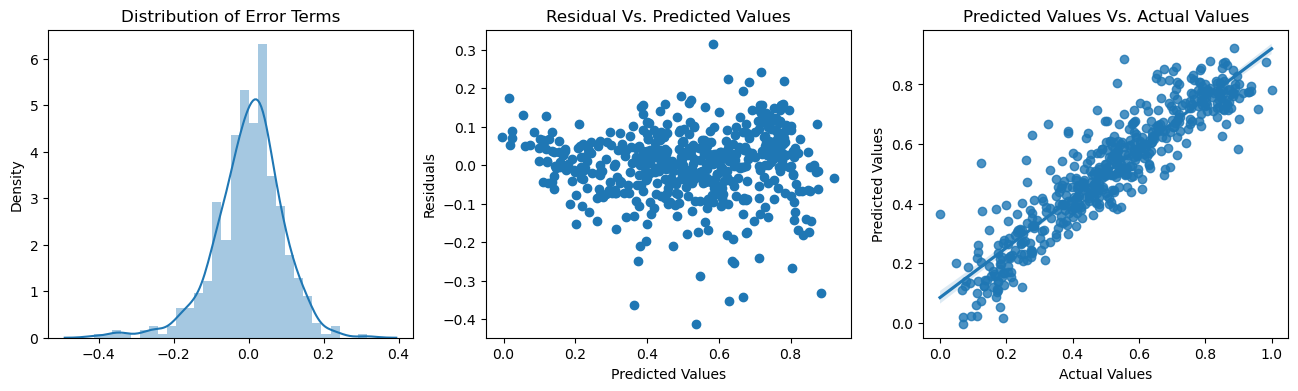

In [98]:
# Ploting of Residuals - Checking Assumptions & Pattern

plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
sns.distplot(res)
plt.title('Distribution of Error Terms')

plt.subplot(1,3,2)
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1,3,3)
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Values Vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

>##### **Summary 5:**
>    - Residual is the Error, which is the difference between an observed value and a predicted value in regression analysis
>    - As per distribution plot, Error Terms are normally Distributed with mean Zero. Hence Model is obeying the assumption of Normal >distribution
>    - As per Scatter plot, no specific Pattern observed in the Error Terms with respect to Prediction, hence we can say Error terms >are independent of each other.
>    - As per regplot, Error Terms have almost a Constant Variance, Hence it follows the Assumption of Homoscedasticity


## Step 6: Model Evaluation on Test Dataset

#### Applying MinMaxScaling on Test data

In [102]:
# For the Test Data only Transform needs to be done.
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [103]:
### Dividing into X and y sets for the model building

y_test = df_test.pop('cnt')
X_test = df_test
print (y_test.shape)
print (X_test.shape)

(219,)
(219, 29)


In [104]:
#Dropping the features which were eliminated from X_train during Model creation & training

X_test = X_test.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Oct', 'Nov',
       'Dec', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Mist', 'hum', 'holiday', 'Aug'],axis=1)


In [105]:
X_test.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter', 'Sep',
       'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [106]:
# Adding Constant Variable
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Saturday', 'Clear', 'L Snow'],
      dtype='object')

In [107]:
# Predict the Price for Test Data using the Trainned Model

y_test_pred = lm.predict(X_test_sm)

y_test_pred.head()

184    0.438284
535    0.923897
299    0.411787
221    0.563701
152    0.585177
dtype: float64

In [108]:
# from sklearn.metrics import r2_score

# Checking the Accuracy of the Test Model

round((r2_score(y_true=y_test,y_pred=y_test_pred)),3)

0.796

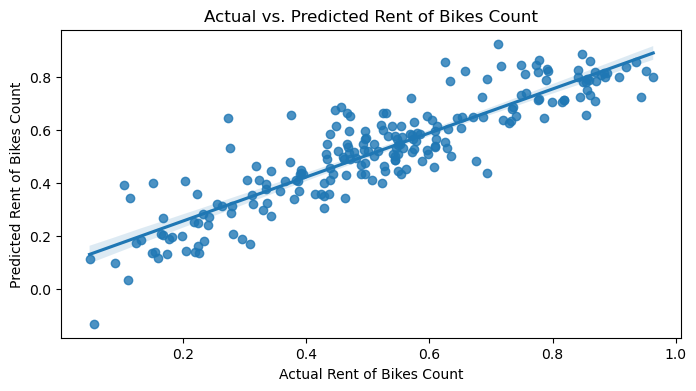

In [109]:
# Plotting y_test and y_test_pred to understand the relationship.
plt.figure(figsize = (8,4))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

In [110]:
Coefficients = round(lm.params,2)
Coeff_sorted = Coefficients.sort_values(ascending = False)
Coeff_sorted

temp          0.55
yr            0.23
winter        0.13
Sep           0.10
summer        0.09
Clear         0.08
Saturday      0.07
workingday    0.06
const        -0.01
windspeed    -0.16
L Snow       -0.21
dtype: float64

>### Best Fit Line Equation for Multiple Linear Regression Model 

>**cnt =  (0.55 * temp) + (0.23 * yr) + (0.13 * winter) + (0.10 * Sep) + (0.09 * summer) + (0.08 * Clear) + (0.07 * Saturday) + (0.06 * workingday) - (0.01 * const) - (0.16 * windspeed) - (0.21 * L Snow)**

## ***Bike Sharing MLR Model Recommendation:*** 

> As per MLR model, Demand dynamics significantly depends upon independent variables - "temp", "Light snow", "windspeed", "season-winter" &  "month - sept".

> **Temperature** with the highest positive Coeff. **is the most Significant feature for business in predicting the demand** for shared bikes. 
 
> And, **Weather conditions like light snow & windspeed are negative influencers** to the demand of shared bikes.
 
> Recommendation: Boom Bikes need to build their strategy on how to tackle with bad weather condition, may be a solution which protect customers in bad weather conditions, to improve the demand and hence their profit margins. 

> An interesting observation is **demand is more in winters, specifically "sept" month showed more demand**, So business can ensure high availability during this period.

> Another interesting observation is **people rent bikes more on Saturdays, followed by workingdays, but definately not on Sundays or Holidays**. 

> As the shared bikes demand is less when the weather condition is bad, this time can be used for organising any large scale periodic maintenece of these bikes, to ensure minimum business impact.

> Factual observation, **Demand of shared bikes has significantly increased from 2018 to 2019**, which means Book Bikes is doing good in business, and with a Postive linear relationship between actual rented bikes & predicted rented bikes. 
   